#### Randy Baicich                                                                                    

# Capstone Project 1: 

# *Shark Attacks in Coastal Waters*

The dataset sourced to be used in this project was originally collected from the Global Shark Attack file on the [Shark Research Institute's website](https://www.sharkattackfile.net). The dataset is available for download from [Kaggle](https://www.kaggle.com/c/shark-attack-dataset).

*In this notebook, I will use the Shark Attack dataset to perform a comprehensive analysis of the data. The first step is to import the necessary libraries and modules to facilitate data processing and analysis. Once the dataset is imported, the next step is to ensure that the data is tidy, which involves organizing and cleaning it for further analysis. This includes tasks such as removing unnecessary columns, capitalizing column names, and removing extra spaces. After tidying the data, the next step is to transform it by performing various calculations to derive meaningful insights. This may involve calculating statistics such as counts or averages as well as creating new features based on existing data. I will also attempt to connect to an [ElephantSQL](https://www.elephantsql.com/) instance, to perform queries using the created tables. Once connected to the instance the transformed data is then used to visualize the data. I will create several visualizations, including scatter plots and bar charts, as well as use [Tableu](https://public.tableau.com/app/discover) to explore relationships between different variables and gain insights into the patterns and distributions present in the data. Finally, the last step is to communicate the findings and insights obtained from the analysis. This includes summarizing the key findings, presenting visualizations, and providing interpretations and recommendations based on the results.*

# Starting Hypothesis.

#### *Proceeding the analysis of the Shark Attack dataset, I hypothesize that a select few shark species will be responsible for the majority of shark attacks and fatalities, rather than a wide variety of species. Additionally, I believe that the majority of shark attacks will occur at specific times, indicating a temporal pattern in shark-human interactions. By exploring the data and conducting statistical analysis, I aim to determine if these hypotheses hold true and gain insights into the key factors influencing shark attacks and fatalities.*

## Part 1: *Import, Clean, and Save Data.*

#### *Import all necessary libraries.*

In [1]:
import psycopg2
import pandas as pd
import matplotlib.pyplot as plt

#### *Import the sourced Shark Attack data.*

In [2]:
df = pd.read_csv(r'C:\Users\RedneckRandy\Documents\GitHub\Capstone-Project-1\GSAF5.csv', low_memory=False)


#### *Clean the CSV file/data.*

In [3]:
#Capitalize all columns
df.columns = [col.capitalize().strip() for col in df.columns]
df

,Index,Case number,Date,Year,Type,Country,Area,Location,Activity,Name,...,Unnamed: 246,Unnamed: 247,Unnamed: 248,Unnamed: 249,Unnamed: 250,Unnamed: 251,Unnamed: 252,Unnamed: 253,Unnamed: 254,Unnamed: 255
0,0,2020.02.05,5-Feb-20,2020.0,Unprovoked,USA,Maui,NaN,Stand-Up Paddle boarding,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,2020.01.30.R,Reported 30-Jan-2020,2020.0,Provoked,BAHAMAS,Exumas,NaN,Floating,Ana Bruna Avila,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2,2020.01.17,17-Jan-20,2020.0,Unprovoked,AUSTRALIA,New South Wales,Windang Beach,Surfing,Will Schroeter,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3,2020.01.16,16-Jan-20,2020.0,Unprovoked,NEW ZEALAND,Southland,Oreti Beach,Surfing,Jordan King,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,4,2020.01.13,13-Jan-20,2020.0,Unprovoked,USA,North Carolina,"Rodanthe, Dare County",Surfing,Samuel Horne,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6457,6457,ND.0005,Before 1903,0.0,Unprovoked,AUSTRALIA,Western Australia,Roebuck Bay,Diving,male,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6458,6458,ND.0004,Before 1903,0.0,Unprovoked,AUSTRALIA,Western Australia,NaN,Pearl diving,Ahmun,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6459,6459,ND.0003,1900-1905,0.0,Unprovoked,USA,North Carolina,Ocracoke Inlet,Swimming,Coast Guard personnel,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6460,6460,ND.0002,1883-1889,0.0,Unprovoked,PANAMA,NaN,"Panama Bay 8ºN, 79ºW",NaN,Jules Patterson,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
#Remove extra space in column names
df.columns = df.columns.str.replace(' ', '')
df

,Index,Casenumber,Date,Year,Type,Country,Area,Location,Activity,Name,...,Unnamed:246,Unnamed:247,Unnamed:248,Unnamed:249,Unnamed:250,Unnamed:251,Unnamed:252,Unnamed:253,Unnamed:254,Unnamed:255
0,0,2020.02.05,5-Feb-20,2020.0,Unprovoked,USA,Maui,NaN,Stand-Up Paddle boarding,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,2020.01.30.R,Reported 30-Jan-2020,2020.0,Provoked,BAHAMAS,Exumas,NaN,Floating,Ana Bruna Avila,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2,2020.01.17,17-Jan-20,2020.0,Unprovoked,AUSTRALIA,New South Wales,Windang Beach,Surfing,Will Schroeter,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3,2020.01.16,16-Jan-20,2020.0,Unprovoked,NEW ZEALAND,Southland,Oreti Beach,Surfing,Jordan King,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,4,2020.01.13,13-Jan-20,2020.0,Unprovoked,USA,North Carolina,"Rodanthe, Dare County",Surfing,Samuel Horne,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6457,6457,ND.0005,Before 1903,0.0,Unprovoked,AUSTRALIA,Western Australia,Roebuck Bay,Diving,male,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6458,6458,ND.0004,Before 1903,0.0,Unprovoked,AUSTRALIA,Western Australia,NaN,Pearl diving,Ahmun,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6459,6459,ND.0003,1900-1905,0.0,Unprovoked,USA,North Carolina,Ocracoke Inlet,Swimming,Coast Guard personnel,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6460,6460,ND.0002,1883-1889,0.0,Unprovoked,PANAMA,NaN,"Panama Bay 8ºN, 79ºW",NaN,Jules Patterson,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
#Drop the first column
df = df.drop(df.columns[0], axis=1)
df

,Casenumber,Date,Year,Type,Country,Area,Location,Activity,Name,Unnamed:9,...,Unnamed:246,Unnamed:247,Unnamed:248,Unnamed:249,Unnamed:250,Unnamed:251,Unnamed:252,Unnamed:253,Unnamed:254,Unnamed:255
0,2020.02.05,5-Feb-20,2020.0,Unprovoked,USA,Maui,NaN,Stand-Up Paddle boarding,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2020.01.30.R,Reported 30-Jan-2020,2020.0,Provoked,BAHAMAS,Exumas,NaN,Floating,Ana Bruna Avila,F,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2020.01.17,17-Jan-20,2020.0,Unprovoked,AUSTRALIA,New South Wales,Windang Beach,Surfing,Will Schroeter,M,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2020.01.16,16-Jan-20,2020.0,Unprovoked,NEW ZEALAND,Southland,Oreti Beach,Surfing,Jordan King,F,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2020.01.13,13-Jan-20,2020.0,Unprovoked,USA,North Carolina,"Rodanthe, Dare County",Surfing,Samuel Horne,M,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6457,ND.0005,Before 1903,0.0,Unprovoked,AUSTRALIA,Western Australia,Roebuck Bay,Diving,male,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6458,ND.0004,Before 1903,0.0,Unprovoked,AUSTRALIA,Western Australia,NaN,Pearl diving,Ahmun,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6459,ND.0003,1900-1905,0.0,Unprovoked,USA,North Carolina,Ocracoke Inlet,Swimming,Coast Guard personnel,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6460,ND.0002,1883-1889,0.0,Unprovoked,PANAMA,NaN,"Panama Bay 8ºN, 79ºW",NaN,Jules Patterson,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
#Remove columns starting with "Unnamed"
df = df.loc[:, ~df.columns.str.startswith('Unnamed')]
df

,Casenumber,Date,Year,Type,Country,Area,Location,Activity,Name,Age,...,Fatal(y/n),Time,Species,Investigatororsource,Pdf,Hrefformula,Href,Casenumber.1,Casenumber.2,Originalorder
0,2020.02.05,5-Feb-20,2020.0,Unprovoked,USA,Maui,NaN,Stand-Up Paddle boarding,NaN,NaN,...,N,09h40,Tiger shark,"K. McMurray, TrackingSharks.com",NaN,NaN,NaN,NaN,NaN,NaN
1,2020.01.30.R,Reported 30-Jan-2020,2020.0,Provoked,BAHAMAS,Exumas,NaN,Floating,Ana Bruna Avila,24,...,N,NaN,NaN,"K. McMurray, TrackingSharks.com",NaN,NaN,NaN,NaN,NaN,NaN
2,2020.01.17,17-Jan-20,2020.0,Unprovoked,AUSTRALIA,New South Wales,Windang Beach,Surfing,Will Schroeter,59,...,N,08h00,"""A small shark""","B. Myatt & M. Michaelson, GSAF; K. McMurray, T...",2020.01.17-Schroeter.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2020.01.17,2020.01.17,6502.0
3,2020.01.16,16-Jan-20,2020.0,Unprovoked,NEW ZEALAND,Southland,Oreti Beach,Surfing,Jordan King,13,...,N,20h30,Broadnose seven gill shark?,"K. McMurray, TrackingSharks.com",2020.01.16-King.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2020.01.16,2020.01.16,6501.0
4,2020.01.13,13-Jan-20,2020.0,Unprovoked,USA,North Carolina,"Rodanthe, Dare County",Surfing,Samuel Horne,26,...,N,14h33,NaN,"C. Creswell, GSAF",2020.01.13-Horne.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2020.01.13,2020.01.13,6500.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6457,ND.0005,Before 1903,0.0,Unprovoked,AUSTRALIA,Western Australia,Roebuck Bay,Diving,male,NaN,...,Y,NaN,NaN,"H. Taunton; N. Bartlett, p. 234",NaN,NaN,NaN,NaN,NaN,NaN
6458,ND.0004,Before 1903,0.0,Unprovoked,AUSTRALIA,Western Australia,NaN,Pearl diving,Ahmun,NaN,...,Y,NaN,NaN,"H. Taunton; N. Bartlett, pp. 233-234",NaN,NaN,NaN,NaN,NaN,NaN
6459,ND.0003,1900-1905,0.0,Unprovoked,USA,North Carolina,Ocracoke Inlet,Swimming,Coast Guard personnel,NaN,...,Y,NaN,NaN,"F. Schwartz, p.23; C. Creswell, GSAF",NaN,NaN,NaN,NaN,NaN,NaN
6460,ND.0002,1883-1889,0.0,Unprovoked,PANAMA,NaN,"Panama Bay 8ºN, 79ºW",NaN,Jules Patterson,NaN,...,Y,NaN,NaN,"The Sun, 10/20/1938",NaN,NaN,NaN,NaN,NaN,NaN


#### *Save the new cleaned CSV.*

In [7]:
df.to_csv('sharks_sorted.csv', index=False)

## Part 2: *Analysis of the data*.

In [8]:
#Total Count of 'Y' in 'Fatal (Y/N)'
total_Y_fatal = df['Fatal(y/n)'].str.count('Y').sum()

#Print the total count of 'Y' in 'Fatal(Y/N)'
print("Total Fatal Attacks':", total_Y_fatal)

Total Fatal Attacks': 1400.0


In [9]:
#Total Count of 'N' in 'Fatal (Y/N)'
total_N_fatal = df['Fatal(y/n)'].str.count('N').sum()

#Print the total count of 'Y' in 'Fatal(Y/N)'
print("Total Non-Fatal Attacks':", total_N_fatal)

Total Non-Fatal Attacks': 4652.0


In [10]:
#Convert 'Age' column to numeric using .loc
df.loc[:, 'Age'] = pd.to_numeric(df['Age'], errors='coerce')

#Filter the dataframe for records where 'Fatal(y/n)' is 'Y'
df_Y_fatal = df[df['Fatal(y/n)'] == 'Y']

#Calculate the average 'Age' for the filtered dataframe
average_age_Y_fatal = df_Y_fatal['Age'].mean()

#Print the average age
print("Average Age of Fatal Victims:", average_age_Y_fatal)



Average Age of Fatal Victims: 27.400329489291597


In [12]:
#Total count for each unique value in 'Location' column
location_totals = df['Location'].value_counts()

#Print the total count for each unique value in 'Location' column
print("Total count for each unique value in 'Location' column:")
print(location_totals)

Total count for each unique value in 'Location' column:
Location
New Smyrna Beach, Volusia County                                  181
Daytona Beach, Volusia County                                      34
Cocoa Beach, Brevard County                                        26
Ponce Inlet, Volusia County                                        21
Melbourne Beach, Brevard County                                    19
                                                                 ... 
Buffels Bay (near Knysna)                                           1
Pensacola Beach, Escambia County                                    1
Cintsa East, East London                                            1
11 miles off Dog Island in the Gulf of Mexico, Franklin County      1
Below the English fort, Trincomalee                                 1
Name: count, Length: 4148, dtype: int64


In [13]:
#Total count for each unique value in 'Species' column
species_totals = df['Species'].value_counts()

#Print the total count for each unique value in 'Species' column
print("Total count for each unique value in 'Species' column:")
print(species_totals)

Total count for each unique value in 'Species' column:
Species
White shark                                                                                                                     166
Shark involvement prior to death was not confirmed                                                                              105
Invalid                                                                                                                         102
Shark involvement not confirmed                                                                                                  89
Tiger shark                                                                                                                      81
                                                                                                                               ... 
Questionable incident - shark bite may have precipitated drowning                                                                 1
C. leucas too

In [14]:
#Total count for each unique value in 'Activity' column
activity_totals = df['Activity'].value_counts()

#Print the total count for each unique value in 'Activity' column
print("Total count for each unique value in 'Activity' column:")
print(activity_totals)

Total count for each unique value in 'Activity' column:
Activity
Surfing                                1025
Swimming                                932
Fishing                                 459
Spearfishing                            350
Bathing                                 166
                                       ... 
Feeding mullet to sharks                  1
Sight-seeing                              1
Netting pilchards                         1
Surf-fishing                              1
Wreck of large double sailing canoe       1
Name: count, Length: 1516, dtype: int64


In [15]:
#Total count for each unique value in 'Type' column
type_totals = df['Type'].value_counts()

#Print the total count for each unique value in 'Type' column
print("Total count for each unique value in 'Type' column:")
print(type_totals)

Total count for each unique value in 'Type' column:
Type
Unprovoked             4716
Provoked                593
Invalid                 552
Sea Disaster            239
Watercraft              142
Boat                    109
Boating                  92
Questionable             10
Unconfirmed               1
Unverified                1
Under investigation       1
Boatomg                   1
Name: count, dtype: int64


In [16]:
#Convert 'Time' column to numeric using .loc
df.loc[:, 'Time'] = pd.to_numeric(df['Time'], errors='coerce')

#Filter the dataframe for records where 'Fatal(y/n)' is 'Y'
df_Y_fatal = df[df['Fatal(y/n)'] == 'Y']

#Calculate the average 'Age' for the filtered dataframe
average_time_Y_fatal = df_Y_fatal['Time'].mean()

#Print the average age
print("Average Time of Fatal Attacks:", average_time_Y_fatal)

Average Time of Fatal Attacks: 1500.0


# Part 3: *Connecting to the database as well as Creating and Inserting into tables.*

#### *Connect to ElephantSQL*

In [17]:
conn = psycopg2.connect(dbname='gblqlzwo',
                        user='gblqlzwo',
                        password='UkEdnFRHD1w6hKODlEDEqHMIKujC814K',
                        host='rajje.db.elephantsql.com')
cur = conn.cursor()

#### *Create neccessary tables.*

In [18]:
#Define the columns for the table
columns = ['Date', 'Year', 'Type', 'Country', 'Area', 'Location', 'Activity', 'Name', 'Age', 'Injury', 'Fatal(y/n)', 'Time', 'Species']



In [19]:
create_table_query = '''
    CREATE TABLE shark_data(
        "Date" VARCHAR(200),
        "Year" INT,
        "Type" VARCHAR(200),
        "Country" VARCHAR(200),
        "Area" VARCHAR(200),
        "Location" VARCHAR(200),
        "Activity" VARCHAR(200),
        "Name" VARCHAR(200),
        "Age" VARCHAR(200),
        "Injury" VARCHAR(200),
        "Fatal(y/n)" VARCHAR(200),
        "Time" VARCHAR(200),
        "Species" VARCHAR(200)
    )
'''
cur.execute(create_table_query)

#### *Insert into the created table.*

In [20]:
for _, row in df[columns].iterrows():
    insert_query = '''
        INSERT INTO shark_data ("Date", "Year", "Type", "Country", "Area", "Location",
                                 "Activity", "Name", "Age", "Injury", "Fatal(y/n)", "Time", "Species")
        VALUES (%s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s)
    '''

    cur.execute(insert_query, tuple(row))
    
    conn.commit()

NumericValueOutOfRange: integer out of range


# Part 4: *Visualize the data and communicate your results.*

#### *Visualization 1: Percentage of Attacks for the Top 7 Activities.*

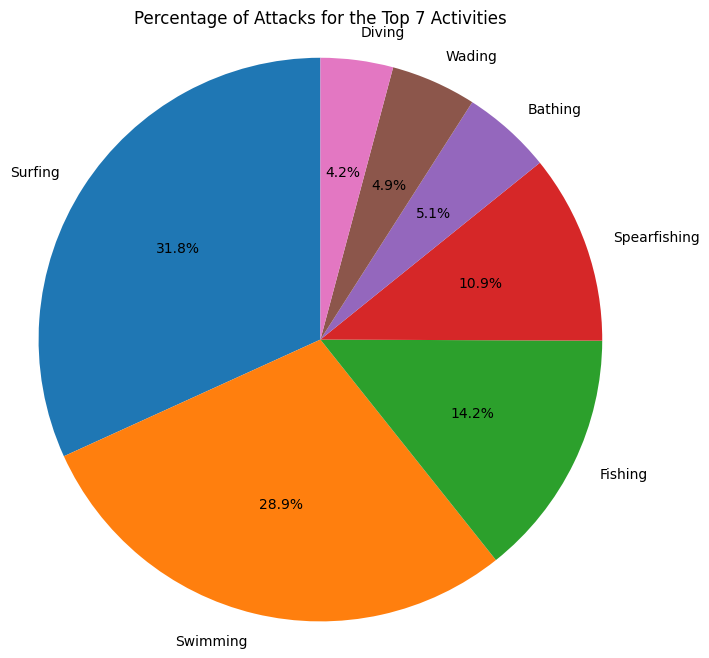

In [21]:
#Counting the occurrences of each activity
activity_counts = df['Activity'].value_counts()

#Selecting the top 15 activities
top_activities = activity_counts.head(7)

#Calculating the percentage of each activity
activity_percentages = (top_activities / len(df)) * 100

#Creating the pie chart
plt.figure(figsize=(8, 8))
plt.pie(activity_percentages, labels=activity_percentages.index, autopct='%1.1f%%', startangle=90)

plt.axis('equal')  #Equal aspect ratio ensures that pie is drawn as a circle
plt.title('Percentage of Attacks for the Top 7 Activities')
plt.show()

#### *Visualization 2: Number of Shark Attacks per Country (Top 20).*

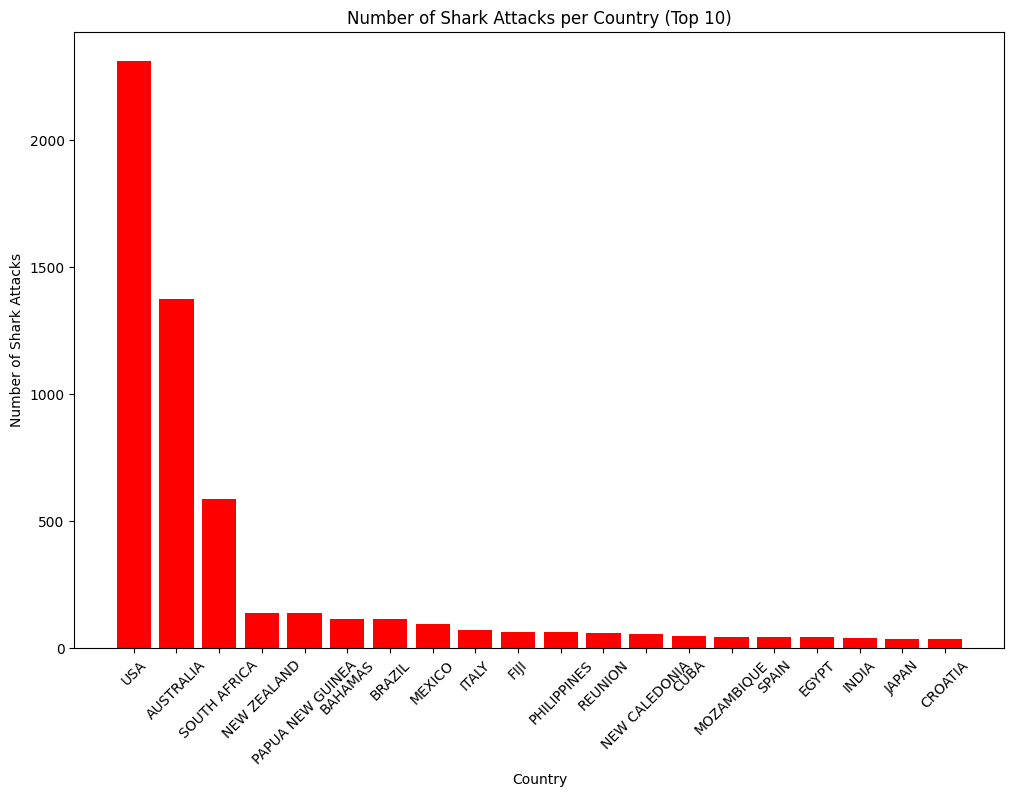

In [22]:

#Extracting the required columns for analysis
countries = df['Country'].dropna()

#Counting the number of shark attacks per country
attacks_per_country = countries.value_counts()[:20]

#Creating the bar chart for shark attacks per country
plt.figure(figsize=(12, 8))
plt.bar(attacks_per_country.index, attacks_per_country.values, color='red')
plt.xlabel('Country')
plt.ylabel('Number of Shark Attacks')
plt.title('Number of Shark Attacks per Country (Top 10)')
plt.xticks(rotation=45)
plt.show()



#### *Visualization 3: Top 10 Total Fatalities by Species.*

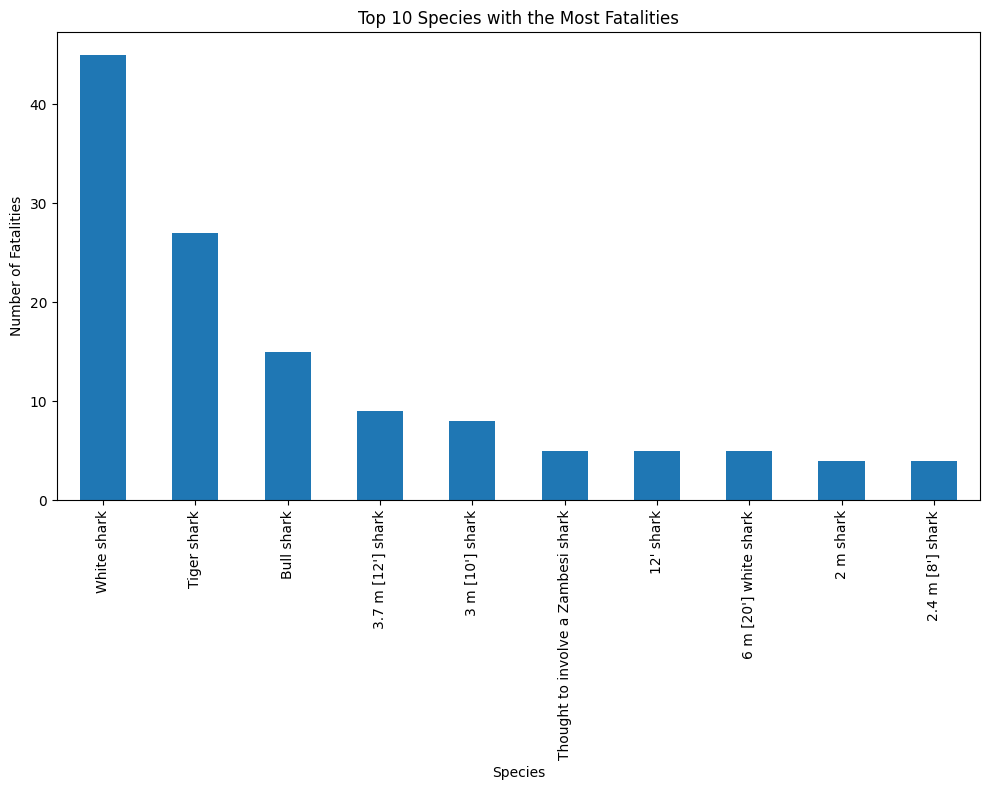

In [23]:
top_10_species = df[df['Fatal(y/n)'] == 'Y']['Species'].value_counts().nlargest(10)
plt.figure(figsize=(10, 8))
top_10_species.plot(kind='bar')
plt.xlabel('Species')
plt.ylabel('Number of Fatalities')
plt.title('Top 10 Species with the Most Fatalities')    
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()



#### *Close Connections*

In [24]:
cur.close()
conn.close()

# Part 5: *Findings, Summary, and Conclusion.*

The analysis of the Shark Attack dataset revealed several key findings. Firstly, attacks while surfing were the most common, accounting for 31.8% of all recorded shark attacks, followed by swimming at 28.9% and fishing at 14.2%. The United States had the highest number of shark attacks, followed by Australia. White Sharks were responsible for over 40 fatalities, making them the leading species in fatal shark attacks, while Tiger Sharks accounted for almost 30 fatalities. Other shark species had minimal involvement in fatalities. We also learn from the analaysis above that the average time of fatal attacks is 1500 or 3 PM. The findings support the hypothesis that a select few shark species are responsible for the majority of shark attacks and fatalities. White Sharks and Tiger Sharks emerged as the primary culprits, while other species played a lesser role. The geographic distribution revealed that the United States and Australia have higher incidences of shark attacks compared to other regions.

These findings highlight the need for understanding shark behavior, activity patterns, and species-specific behaviors. Such knowledge can contribute to the development of safety measures, public awareness campaigns, and conservation efforts to mitigate the risk of shark attacks and promote coexistence between humans and sharks. By recognizing the activities with higher risks and focusing on the regions with greater incidents, targeted measures can be implemented to enhance safety and minimize human-shark conflicts.